In [18]:
pip install symbulate

Note: you may need to restart the kernel to use updated packages.Collecting symbulate



In [19]:
from symbulate import *
%matplotlib inline

In [50]:
import enum, random
class Kid(enum.Enum):
    BOY = 0
    GIRL = 1
def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])
both_girls = 0
older_girl = 0
either_girl = 0
random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1
print("P(both | older):", both_girls / older_girl)   
print("P(both | either):", both_girls / either_girl)

P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325


In [60]:
either_girl
both_girls 
older_girl 

9874

In [ ]:
#7,464 / 10,000 ~ roughly 75% or 3/4 probability that there is at least one girl
#2,472 / 10,000 ~ roughly 25% or 1/4 probability that both children are girls
#4,937 / 10,000 ~ roughly 50% or 1/2 probability that the first child is a girl

In [ ]:
import enum, random
class Kid(enum.Enum):
    BOY = 0
    GIRL = 1
def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

In [54]:
older_girl 

4937

In [ ]:
 #4,937 / 10,000 ~ roughly 50% or 1/2 probability that the first child is a girl

In [55]:
both_girls 

2472

In [ ]:
 #2,472 / 10,000 ~ roughly 25% or 1/4 probability that both children are girls

In [56]:
either_girl 

7464

In [57]:
#7,464 / 10,000 ~ roughly 75% or 3/4 probability that there is at least one girl

In [58]:
random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1

In [59]:
print("P(both | older):", both_girls / older_girl)   
print("P(both | either):", both_girls / either_girl) 

P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325


In [20]:
die = list(range(1, 6 + 1))
P = BoxModel(die, size=2)
X = RV(P, sum)
Y = RV(P, max)

In [21]:
die = list(range(1, 6 + 1))
P = BoxModel(die, size=2)
X = RV(P, sum)
Y = RV(P, max)
(X & Y).sim(10000).tabulate(normalize=True)

"(2, 1)",0.0307
"(3, 2)",0.0571
"(4, 2)",0.0283
"(4, 3)",0.0519
"(5, 3)",0.0588
"(5, 4)",0.0518
"(6, 3)",0.0293
"(6, 4)",0.0555
"(6, 5)",0.0557
"(7, 4)",0.0549
"(7, 5)",0.0552


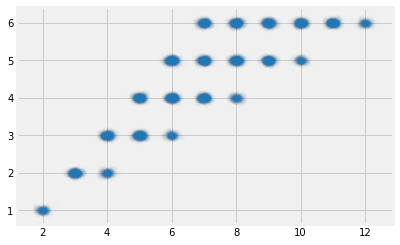

In [22]:
die = list(range(1, 6 + 1))
P = BoxModel(die, size=2)
X = RV(P, sum)
Y = RV(P, max)
(X & Y).sim(10000).plot(jitter = True, alpha = 0.01)

In [23]:
covmatrix = [[1, -0.5],
             [-0.5, 4]]
X, Y = RV(MultivariateNormal(mean = [0, 1], cov = covmatrix))

In [24]:
X, Y, Z = RV(Binomial(5, 0.5) * Normal(0, 1) * Uniform(0, 1))  # see below for notes on "unpacking"
(X & Y & Z).sim(10000)

0,"(2, -1.0683050970189176, 0.4187910279164597)"
1,"(2, 0.5680913667294977, 0.6989732547438195)"
2,"(2, 0.25135302208971627, 0.21776619657744734)"
3,"(1, 0.026973578558422837, 0.288457869675228)"
4,"(3, 1.5569681391947696, 0.320763720789602)"
5,"(1, 0.1618139886700865, 0.8720649332804588)"
6,"(2, -0.9577583313516339, 0.7451222330712027)"
7,"(1, -0.6139454632548416, 0.5769861363867212)"
8,"(1, 0.12092517633577213, 0.16803881489466366)"
...,...
9999,"(1, 0.27059572519774977, 0.1564818082103291)"


In [25]:
X = RV(Binomial(5, 0.5))
Y = RV(Normal(0, 1))
Z = RV(Uniform(0, 1)) 
X, Y, Z = AssumeIndependent(X, Y, Z)

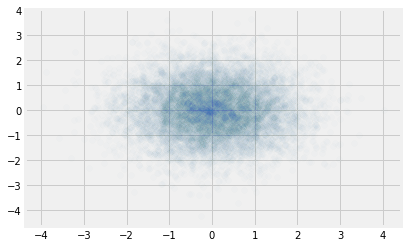

In [26]:
X, Y = RV(Normal(0,1) ** 2)  # see below for notes on "unpacking"
(X & Y).sim(10000).plot(alpha = 0.01)

In [ ]:
#Marginal distributions

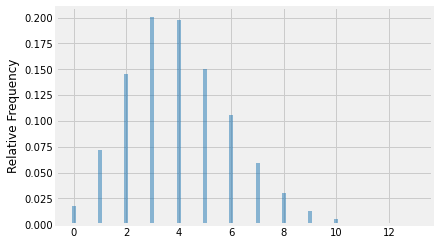

In [27]:
X = RV(Binomial(5, 0.5) * Normal(0, 1) * Poisson(4))
X[2].sim(10000).plot()

In [28]:
X.sim(10000).mean()

(2.4779, -0.0008209811934746666, 4.0147)

In [29]:
X.sim(10000).sd()

(1.1109770654698536, 1.0057763269719846, 2.0188895858862472)

In [30]:
covmatrix = [[1, -0.5],
             [-0.5, 4]]
X, Y = RV(MultivariateNormal(mean = [0, 1], cov = covmatrix))
xy = (X & Y).sim(10000)
xy.mean()

(-0.0032602340973823373, 0.9979319198334496)

In [31]:
xy.var()

(0.9998626316467049, 4.006578401502719)

0.02810269747571827

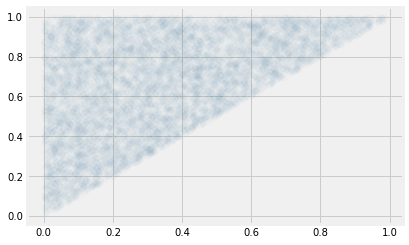

In [32]:
P = Uniform(a=0, b=1) ** 2
X = RV(P, min)
Y = RV(P, max)
xy = (X & Y).sim(10000)
plot(xy, alpha = 0.01)
xy.cov()

In [33]:
covmatrix = [[1, -0.5],
             [-0.5, 4]]
X, Y = RV(MultivariateNormal(mean=[0, 1], cov=covmatrix)) # see below for notes on "unpacking"
xy = (X & Y).sim(10000)
xy.cov()

-0.4828940635137644

In [34]:
(X & Y & X+Y).sim(10000).cov()

array([[ 0.9982104 , -0.50536052,  0.49284988],
       [-0.50536052,  4.04707818,  3.54171766],
       [ 0.49284988,  3.54171766,  4.03456755]])

In [35]:
X, Y = RV(BivariateNormal(mean1=0, mean2=1, sd1=1, sd2=2, corr=-0.25 ))
xy = (X & Y).sim(10000)
xy.corr()

-0.2587840052195715

In [36]:
(X & Y & X+Y).sim(10000).corr()

array([[ 1.        , -0.25387456,  0.24967203],
       [-0.25387456,  1.        ,  0.87321982],
       [ 0.24967203,  0.87321982,  1.        ]])